In [1]:
import pandas as pd

### create a data frame

In [69]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[2, 2, 3],
columns=['a', 'b', 'column_3'])

In [70]:
df

,a,b,column_3
2,4,7,10
2,5,8,11
3,6,9,12


In [37]:
type(df.columns[0])

str

In [38]:
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])

In [39]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [40]:
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
[('d',1),('d',2),('e',2)],
names=['n','v']))

In [41]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

### Read

In [42]:
# df=pd.read_csv("")

In [43]:
df.head()

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [44]:
df.describe()

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


### hist

<AxesSubplot:>

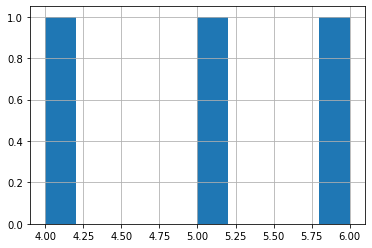

In [45]:
df["a"].hist()

### merging

In [46]:
df1=pd.DataFrame([[1,2,3],[4,5,6]])
df1

,0,1,2
0,1,2,3
1,4,5,6


In [47]:
df2=pd.DataFrame([[7,8,9],[10,11,12]])
df2

,0,1,2
0,7,8,9
1,10,11,12


In [48]:
pd.concat([df1,df2])

,0,1,2
0,1,2,3
1,4,5,6
0,7,8,9
1,10,11,12


In [49]:
pd.concat([df1,df2],axis=1)

,0,1,2,0,1,2
0,1,2,3,7,8,9
1,4,5,6,10,11,12


### calcules

In [50]:
(df1+1)*2

,0,1,2
0,4,6,8
1,10,12,14


In [51]:
df1[ df1[0]%2==0 ]  =  df1[ df1[0]%2==0 ]*2

In [52]:
df1

,0,1,2
0,1,2,3
1,8,10,12


In [53]:
import numpy as np
np.log(df1)

,0,1,2
0,0.000000,0.693147,1.098612
1,2.079442,2.302585,2.484907


In [54]:
df1.sum(axis=1)

0     6
1    30
dtype: int64

In [55]:
df1.sum(axis=0)

0     9
1    12
2    15
dtype: int64

In [56]:
df1[df1%2==0]=-1
df1

,0,1,2
0,1,-1,3
1,-1,-1,-1


In [57]:
df1.abs()

,0,1,2
0,1,1,3
1,1,1,1


### Join

In [58]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [59]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [60]:
df.merge(other,"inner")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [61]:
pd.merge(df,other,"outer")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [62]:
pd.merge(df,other,"left")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [63]:
pd.merge(df,other,"right")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


### loc and iloc

In [64]:
df.iloc[1]

key    K1
A      A1
Name: 1, dtype: object

In [65]:
df.loc[df.index==1,"0"]=1
df

,key,A,0
0,K0,A0,NaN
1,K1,A1,1.0
2,K2,A2,NaN
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


In [74]:
df.loc[(df.a==5) & (df.b==8),"c"]=12

In [75]:
df

,a,b,column_3,c
2,4,7,10,NaN
2,5,8,11,12.0
3,6,9,12,NaN


In [76]:
df.iloc[1]["a"]

5.0

### apply

In [77]:
df["k"]=df["a"].apply(lambda x : x+3/2 if x==6 else x)

In [78]:
df

,a,b,column_3,c,k
2,4,7,10,NaN,4.0
2,5,8,11,12.0,5.0
3,6,9,12,NaN,7.5


In [79]:
df["l"]=df.apply(lambda x: x["a"]+x["c"] ,axis=1)

In [81]:
df

,a,b,column_3,c,k,l
2,4,7,10,NaN,4.0,NaN
2,5,8,11,12.0,5.0,17.0
3,6,9,12,NaN,7.5,NaN


### null

In [82]:
df.isna()

,a,b,column_3,c,k,l
2,False,False,False,True,False,True
2,False,False,False,False,False,False
3,False,False,False,True,False,True


In [92]:
df.isnull().sum()

a           0
b           0
column_3    0
c           2
k           0
l           2
dtype: int64

In [111]:
df=df.fillna("8")

### reindex

In [108]:
df.reindex()
df

,b,column_3,c,k,l
2,7,10,NaN,4.0,NaN
2,8,11,12.0,5.0,17.0
3,9,12,NaN,7.5,NaN


### Drop

In [112]:
df.drop(["b"],inplace=True,axis=1)

In [113]:
df

,column_3,c,k,l
2,10,8,4.0,8
2,11,12.0,5.0,17.0
3,12,8,7.5,8


## GroupBy

12.0         AxesSubplot(0.1,0.15;0.363636x0.75)
8       AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

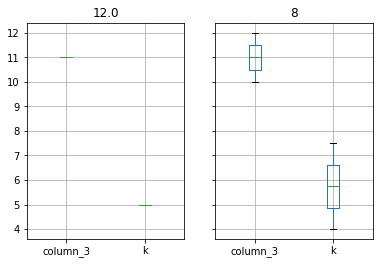

In [114]:
df.groupby(["c"]).boxplot()

In [115]:
df.groupby(["c"]).

,column_3,k,l
c,,,
12.0,11,5.0,17.0
8,10,4.0,8


In [116]:
df.groupby(["c"]).median()

,column_3,k
c,,
12.0,11,5.00
8,11,5.75


### refrence

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

https://www.enthought.com/wp-content/uploads/Enthought-Python-Pandas-Cheat-Sheets-1-8-v1.0.2.pdf